# Digitale Zaubertinte: Steganography workshop

**Author:** Martin Beneš, Verena Lachner

<div style="text-align: center">
<a href="https://www.github.com/uibk-uncover/mip-stego-demo">
github.com/uibk-uncover/mip-stego-demo
</a>
</div>

## Notebook setup

For this notebook, we will use a sample image `00001.tif` from ALASKA database. Run following code chunk to download it.

In [1]:
# download theft from GitHub
import requests
res = requests.get('https://github.com/uibk-uncover/mip-stego-demo/raw/main/img/theft.png')
with open('theft.png', 'wb') as f:
    f.write(res.content)

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 3)

## A matrix is a grid of numbers.

We create a matrix with 3 rows and 4 columns.

In [3]:
import numpy as np
matrix = np.array([
    [  0,  20,  40,  60],
    [ 80, 100, 120, 140],
    [160, 180, 200, 220],
], dtype='uint8')

In [4]:
matrix.shape

(3, 4)

## An image is a matrix.

In [5]:
matrix

array([[  0,  20,  40,  60],
       [ 80, 100, 120, 140],
       [160, 180, 200, 220]], dtype=uint8)

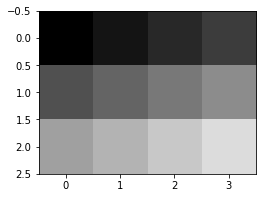

In [6]:
import matplotlib.pyplot as plt
plt.imshow(matrix, cmap='gray', vmin=0, vmax=255);

## Our eyes don't distinguish very close colors.

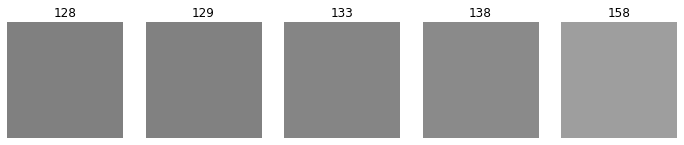

In [7]:
fig, ax = plt.subplots(1, 5, sharey=True)
for i, v in enumerate([0, 1, 5, 10, 30]):
    ax[i].imshow([[128+v]], vmin=0, vmax=255, cmap='gray');
    ax[i].set_title(f'{128+v}');
    ax[i].axis('off');

This will be important later for the steganography ...

## An image can be saved into a file ...

In [8]:
from PIL import Image
im_matrix = Image.fromarray(matrix)

In [9]:
im_matrix.save('image.png')

## ... and loaded from a file again.

In [10]:
im2_matrix = Image.open('image.png')

In [11]:
matrix2 = np.array(im2_matrix)

## It will stay the same.

In [12]:
(matrix == matrix2).all()

True

## ... at least for lossless formats.

- PNG
- TIFF
- PPM
- ...

## Let's play with real images.

In [13]:
im = Image.open('theft.png')  # load image
cover = np.array(im)  # PIL to numpy

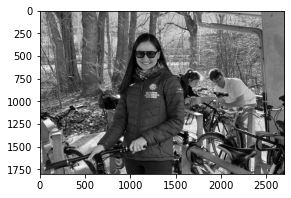

In [14]:
plt.imshow(cover, cmap = "gray");

In [15]:
cover.shape

(1800, 2700)

## Image can be cropped.

In [16]:
# row 600-1200, column 1500-2200
cover_crop = cover[600:1200, 1500:2200]

In [17]:
cover_crop = cover_crop.copy()  # replace view with copy

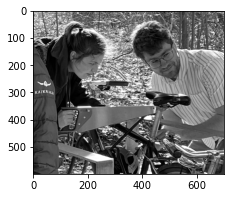

In [18]:
plt.imshow(cover_crop, vmin=0, vmax=255, cmap='gray');

## Image can be modified.

In [19]:
s = 20
cover[600-s:1200+s, 1500-s:2200+s] = 255  # set pixels white

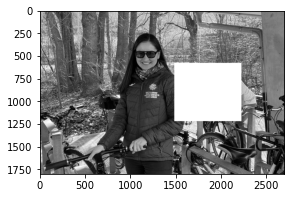

In [20]:
plt.imshow(cover, cmap = "gray");

In [21]:
cover[600:1200, 1500:2200] = cover_crop  # insert crop

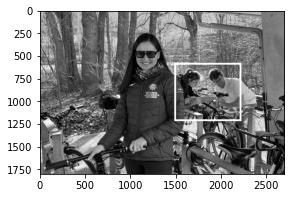

In [22]:
plt.imshow(cover, cmap = "gray");

## Take-out

- Grayscale image is a matrix of pixel values.

- $\pm1$ changes are imperceptible.

- In Python, you can use `pillow` and `matplotlib` to process images.

## Hands-on: Image processing

- Censor bystander's face by blackout
